# This produces the plot of built environment effects by MSA size

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [25]:
coefs = pd.read_table('../stata/be.tsv', skiprows=[0, 1, 3, 4])

In [26]:
coefs = coefs[coefs.VARIABLES.apply(lambda x: 'density' in str(x))]
coefs

,VARIABLES,LABELS,coefEform,ci_lowEform,ci_highEform
66,0b.msaSize#0b.density,NaN,1,1.000,1.000
67,0b.msaSize#1.density,NaN,1.077,0.812,1.427
68,0b.msaSize#2.density,NaN,1.316,0.943,1.835
69,0b.msaSize#3.density,NaN,1.291,0.922,1.807
70,0b.msaSize#4.density,NaN,1.074,0.731,1.578
71,0b.msaSize#5.density,NaN,1.089,0.675,1.755
72,0b.msaSize#6.density,NaN,0.830,0.209,3.293
73,0b.msaSize#7o.density,NaN,1,1.000,1.000
74,1o.msaSize#0b.density,NaN,1,1.000,1.000
75,1.msaSize#1.density,NaN,0.941,0.711,1.244


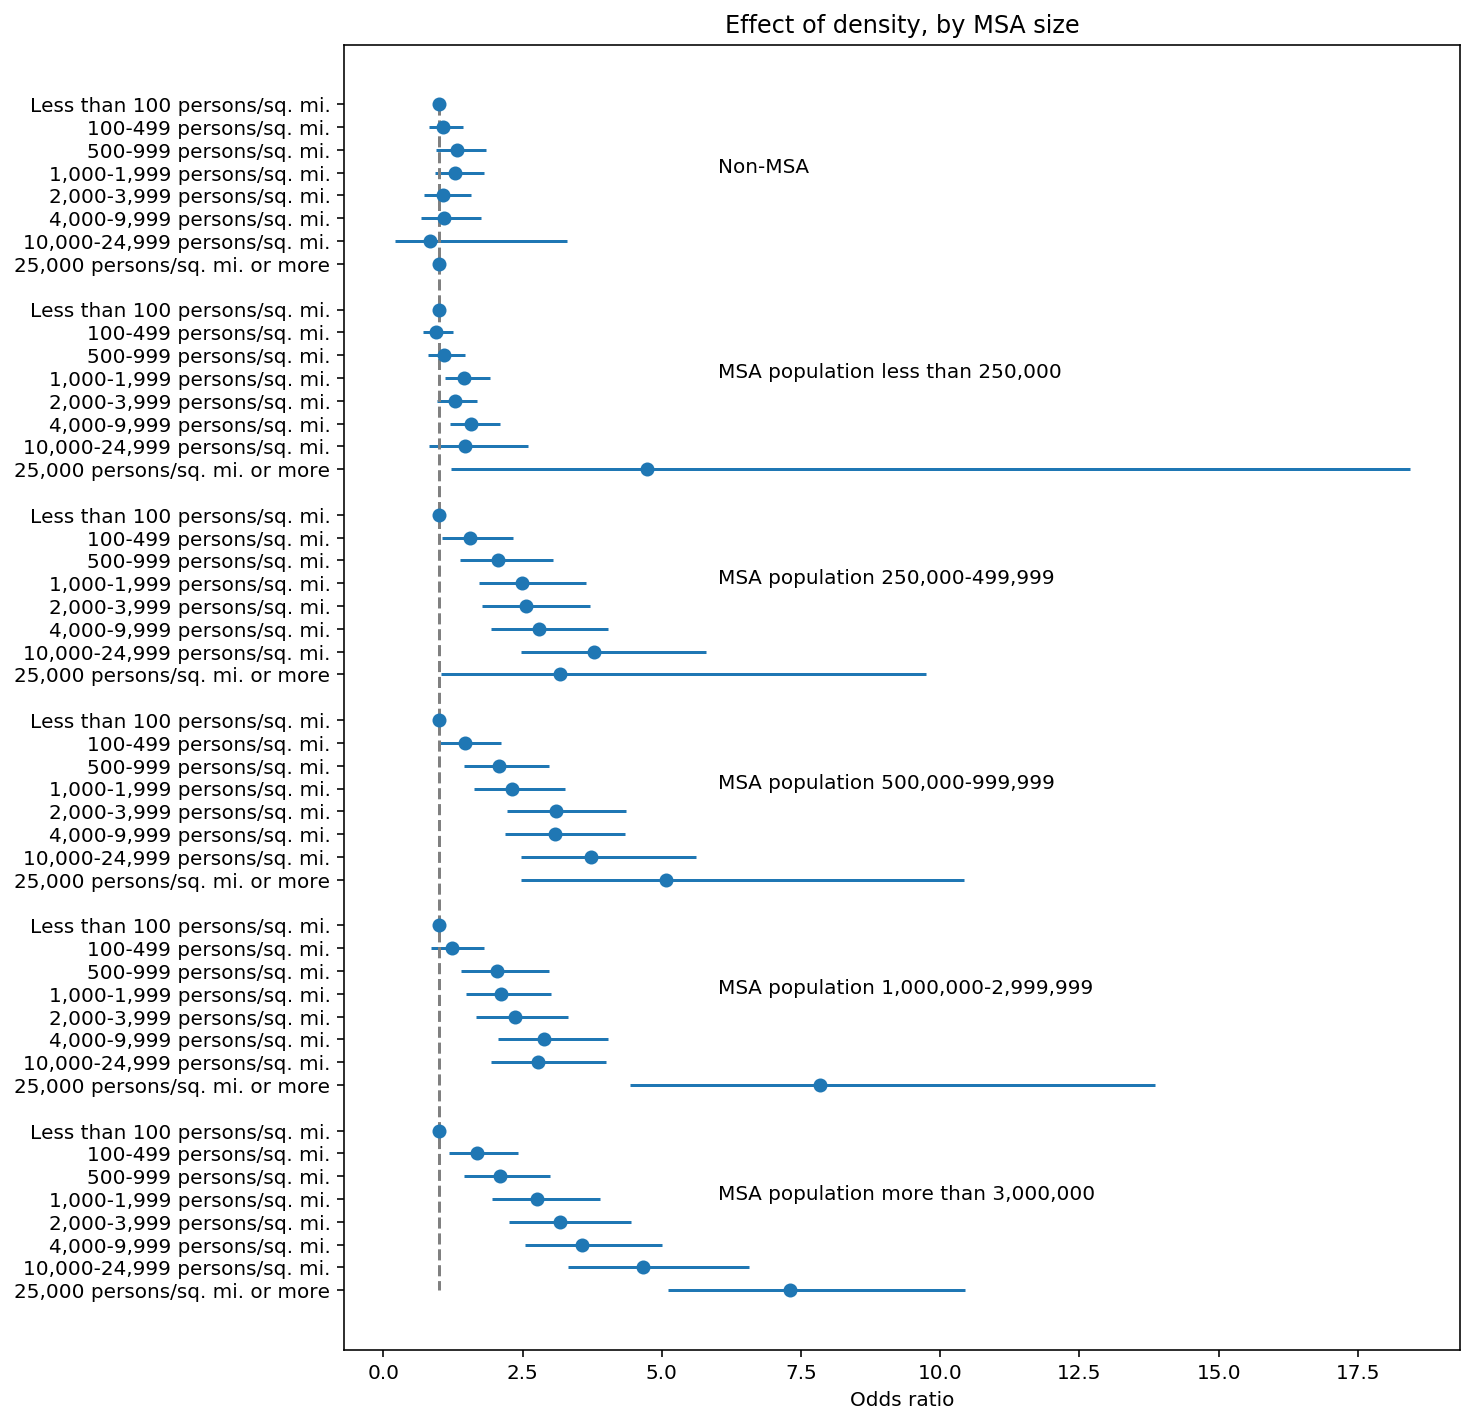

In [58]:
# parse the coefficient names, get them labels and build an index
lo = np.zeros(len(coefs))
hi = np.zeros(len(coefs))
est = np.zeros(len(coefs))
xpos = np.zeros(len(coefs))
lab = ['' for i in range(len(coefs))]

parse = re.compile(r'([0-9]).?\.msaSize#([0-9]).?\.density')

labels = {
    0: 'Less than 100 persons/sq. mi.',
    1: '100-499 persons/sq. mi.',
    2: '500-999 persons/sq. mi.',
    3: '1,000-1,999 persons/sq. mi.',
    4: '2,000-3,999 persons/sq. mi.',
    5: '4,000-9,999 persons/sq. mi.',
    6: '10,000-24,999 persons/sq. mi.',
    7: '25,000 persons/sq. mi. or more',
}

sizeLabels = {
    0: 'Non-MSA',
    1: 'MSA population less than 250,000',
    2: 'MSA population 250,000-499,999',
    3: 'MSA population 500,000-999,999',
    4: 'MSA population 1,000,000-2,999,999',
    5: 'MSA population more than 3,000,000',
}

for idx, row in coefs.iterrows():
    match = parse.match(row.VARIABLES)
    msaSize = int(match[1])
    density = int(match[2])
    x = msaSize * 8 + density
    lab[x] = labels[density]
    est[x] = row.coefEform
    xpos[x] = x + msaSize # put a gap between different MSA size categories
    lo[x] = row.ci_lowEform
    hi[x] = row.ci_highEform
    
plt.figure(figsize=(10, 12))
plt.plot([1, 1], [0, -np.max(xpos)], '--', color='gray')
plt.errorbar(est, -xpos, xerr=[est - lo, hi - est], fmt='o')
plt.yticks(-xpos, lab)

for size, lbl in sizeLabels.items():
    plt.text(6, -(size * 9 + 3), lbl)
    
plt.xlabel('Odds ratio')
plt.title('Effect of density, by MSA size')
plt.savefig('../fig/density_by_msasize.pdf', bbox_inches='tight')

In [ ]:
# Income effects
